### Install Packages and Import Dataset

In this notebook, we’ll be working with the **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset. This dataset is commonly used in machine learning tasks related to classification, and it contains several features derived from digitized images of breast tumor cells obtained via fine needle aspirates (FNAs).

Each row in the dataset represents one tumor, with a set of measurements calculated from the cell nuclei present in the image. The dataset has the following columns:
- **ID**: Unique identifier for each tumor sample.
- **Diagnosis**: The classification label for the tumor (Malignant or Benign).
- **Radius Mean, Texture Mean, Perimeter Mean, Area Mean**: Various statistical properties of the tumor.
- **Compactness, Concavity, Symmetry**: Other characteristics calculated from the shape and structure of the tumor cells.

The target column is **Diagnosis**, which we will try to predict based on the other features in the dataset.

This dataset was obtained from the UCI Machine Learning Repository, a well-known resource for datasets in the machine learning community.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d

In [16]:
cancer = pd.read_csv('dataset/wdbc.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### What is Pandas?

"But wait, what is that `pd.read_csv()` thing?" Well, it comes from **pandas**, a powerful Python library designed for data manipulation and analysis. 

Pandas allows us to efficiently handle datasets, similar to how you would in Excel, but with far more capabilities. It can handle large datasets and perform complex transformations with just a few lines of code.

The `pd.read_csv()` function is used to load data from a CSV file into a **DataFrame**, which is like a table of data with rows and columns. Each column can hold different types of data (e.g., numbers, text), making it a versatile structure for analysis.

By using pandas in this notebook, we can:
- Load and explore the dataset easily.
- Identify missing or problematic data.
- Group, sort, and manipulate data efficiently.
- Prepare the data for machine learning or statistical analysis.

As we move forward on our journey, you'll see how pandas simplifies a lot of the heavy lifting in data science!

### Inspect the data

The `.info()` method in pandas provides a concise summary of a DataFrame, including the dtype, column names, and non-null values. It’s particularly useful for getting an overview of the dataset's structure and identifying any missing data.

In [17]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


The `.unique()` method in pandas returns the unique values in a column. This method is useful for identifying all distinct values within a dataset, especially when you want to see the different categories or groups present in a column.

In [18]:
cancer["diagnosis"].unique()

array(['M', 'B'], dtype=object)

Clean data by renaming "M" to "Malignant" and "B" to "Benign" using the `.replace` method. The `.replace` method takes one argument: a dictionary that maps previous values to desired new values.

In [19]:
cancer["diagnosis"] = cancer["diagnosis"].replace({
    "M" : "Malignant",
    "B" : "Benign"
})

cancer["diagnosis"].unique()

array(['Malignant', 'Benign'], dtype=object)


To analyze the distribution of benign and malignant tumor observations in the dataset, we can use the `.groupby` and `.size` methods with pandas.

Group the Data by the Class Variable:

1. Use `.groupby` on the Class column to group the data by benign and malignant tumor observations.
Count the Observations:

2. Apply the `.size` method to count the number of observations in each group.

Calculate Percentages:

3. Divide the counts by **the total number of observations** (found using `df.shape`[0]) and multiply by 100 to get the percentage.

In [20]:
100 * cancer.groupby("diagnosis").size() / cancer.shape[0]

diagnosis
Benign       62.741652
Malignant    37.258348
dtype: float64

The `.value_counts` method in pandas efficiently counts the occurrences of each unique value in a column.

In [21]:
cancer["diagnosis"].value_counts()

Benign       357
Malignant    212
Name: diagnosis, dtype: int64

 By using the `normalize=True` argument, it can also return the fraction (or percentage) of each value, providing a quick and convenient way to analyze the distribution of data.

In [22]:
cancer["diagnosis"].value_counts(normalize=True)

Benign       0.627417
Malignant    0.372583
Name: diagnosis, dtype: float64

### Visualizing the Data

Now, let’s create a scatter plot to visualize the relationship between **perimeter mean** and **concavity mean**. This will help us see how these features relate to whether a tumor is benign or malignant.

_The code below may look a bit intimidating, but don’t worry! You don’t need to understand every line right now. It uses matplotlib to create the plot and map different colors to the benign and malignant tumor groups._

_Even if this feels complex, the key takeaway is seeing how we can visualize patterns in the data. Later, as you get more familiar with plotting, you can revisit this code to dissect it further._

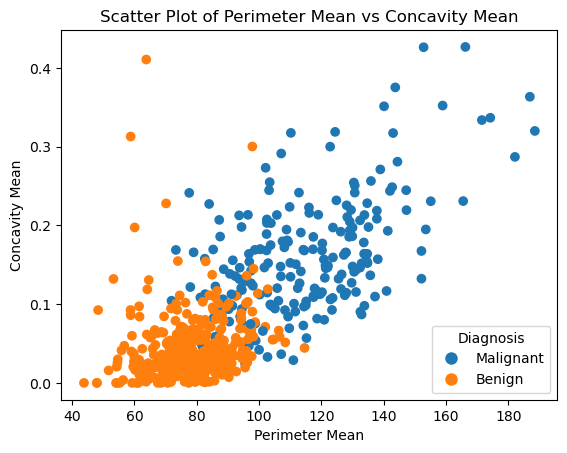

In [23]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Plot
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 
            color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add labels and legend
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles, title='Diagnosis')
plt.show()


_It’s okay if you don’t grasp everything right away—focus on understanding the output and come back to the code when you’re ready!_

- **Malignant Observations**: These tend to be located in the upper right-hand corner of the plot (blue), indicating higher values for both concavity and perimeter.
- **Benign Observations**: These are generally found in the lower left-hand corner (orange), suggesting lower values for concavity and perimeter.

This visual pattern suggests that it may be possible to predict the diagnosis of new tumor images by using their concavity and perimeter mean values.

### K-Nearest Neighbors Manually

In this section, we’ll manually implement the K-nearest neighbors (KNN) algorithm to classify a new data point. The idea behind KNN is simple: given a new observation, the algorithm looks at the "K" closest points in the dataset and assigns the class (benign or malignant) based on the majority class of its neighbors.

We’ll plot the existing data and add a new observation to the plot, then calculate the distances between the new point and the other points in the dataset to find its nearest neighbors.

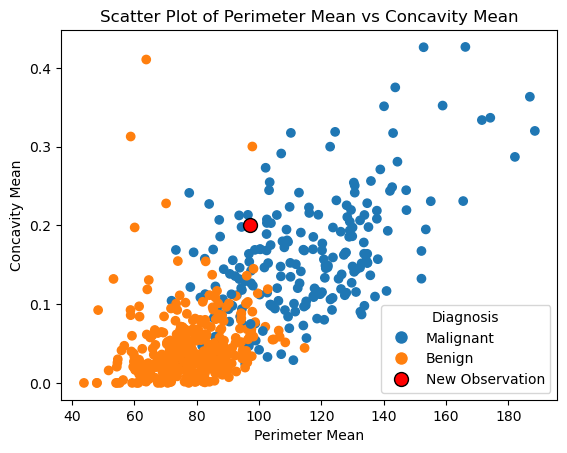

In [24]:
# Plot existing data
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 
            color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20}
plt.scatter(new_observation['perimeter_mean'], new_observation['concavity_mean'],
            color='red', edgecolor='black', s=100, label='New Observation')

# Add labels and legend
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles + [plt.Line2D([0], [0], marker='o', color='w', 
                                          markerfacecolor='red', markeredgecolor='black', 
                                          markersize=10, label='New Observation')], 
           title='Diagnosis')
plt.show()

To find the $K$ nearest neighbors to our new observation, we compute the distance from that new observation to each observation in our training data, and select the $K$ observations corresponding to the smallest distance values. For example, suppose we want to use $K= 5$ neighbors to classify a new observation with mean perimeter 97 and concavity 0.20. We can calculate the distances between our new point and each of the observations in the training set to find the $5$ neighbors that are nearest to our new point. 

$$
Distance = \sqrt{(x_B - x_A)^2 + (y_B - y_A)^2}
$$


 In order to find the $K = 5$ nearest neighbors, we will use the `nsmallest` function from pandas.

In [25]:
new_obs_Perimeter = 97
new_obs_Concavity = 0.20
cancer["dist_from_new"] = (
       (cancer["perimeter_mean"] - new_obs_Perimeter) ** 2
     + (cancer["concavity_mean"] - new_obs_Concavity) ** 2
)**(1/2)

nearest_5 = cancer.nsmallest(5, "dist_from_new")[[
    "perimeter_mean",
    "concavity_mean",
    "diagnosis",
    "dist_from_new"
]]

nearest_5

,perimeter_mean,concavity_mean,diagnosis,dist_from_new
291,97.03,0.05940,Benign,0.143765
138,96.85,0.15390,Malignant,0.156924
15,96.73,0.16390,Malignant,0.272403
514,97.26,0.07486,Malignant,0.288548
54,97.26,0.05253,Malignant,0.298910


 Tumor Data with Distance Calculations

| Perimeter Mean | Concavity Mean | Distance                                      | Diagnosis     |
|----------------|----------------|-----------------------------------------------|---------------|
| 97.03          | 0.05940        | $\sqrt{(97.03 - 97)^2 + (0.05940 - 0.20)^2}$ | Benign        |
| 96.85          | 0.15390        | $\sqrt{(96.85 - 97)^2 + (0.15390 - 0.20)^2}$ | Malignant     |
| 96.73          | 0.16390        | $\sqrt{(96.73 - 97)^2 + (0.16390 - 0.20)^2}$ | Malignant     |
| 97.26          | 0.07486        | $\sqrt{(97.26 - 97)^2 + (0.07486 - 0.20)^2}$ | Malignant     |
| 97.26          | 0.05253        | $\sqrt{(97.26 - 97)^2 + (0.05253 - 0.20)^2}$ | Malignant        |



The result of this computation shows that 4 of the 5 nearest neighbors to our new observation are malignant

### What if we have more than 2 variables?

So far, we’ve only looked at the relationship between two features: **perimeter mean** and **concavity mean**. But what if we want to include more features in our analysis? In that case, we can extend our scatter plot into three dimensions to visualize how a third feature (in this case, **symmetry mean**) interacts with the others.

This 3D scatter plot will help us see if adding another feature might give us more insight into classifying the data. By visualizing multiple features at once, we can start to understand how they work together to differentiate benign from malignant tumors.

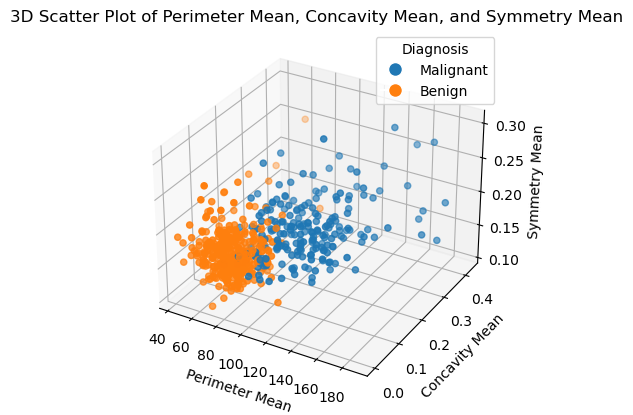

In [26]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Create a 3D plot
ax = plt.axes(projection="3d")

# Plot data points with color corresponding to diagnosis
sc = ax.scatter3D(cancer['perimeter_mean'], cancer['concavity_mean'], cancer['symmetry_mean'], 
                  c=cancer['diagnosis'].map(color_map), marker='o')

# Add axis labels
ax.set_xlabel('Perimeter Mean')
ax.set_ylabel('Concavity Mean')
ax.set_zlabel('Symmetry Mean')
ax.set_title('3D Scatter Plot of Perimeter Mean, Concavity Mean, and Symmetry Mean')

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add legend
plt.legend(handles=handles, title='Diagnosis')

# Show plot
plt.show()


Suppose we want to use $K= 5$ neighbors to classify a new observation with a perimeter of 97, concavity of 0.20, and symmetry of 0.22. 

$$
Distance = \sqrt{(x_B - x_A)^2 + (y_B - y_A)^2 + (z_B - z_A)^2}
$$

<module 'matplotlib.pyplot' from 'c:\\Users\\Yenko\\anaconda3\\envs\\openai\\lib\\site-packages\\matplotlib\\pyplot.py'>

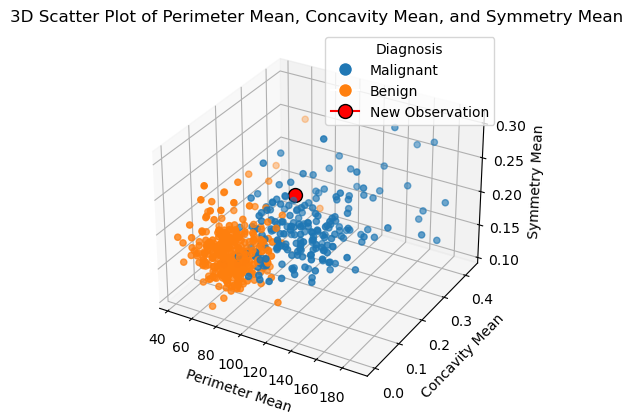

In [27]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Create a 3D plot
ax = plt.axes(projection="3d")

# Plot data points with color corresponding to diagnosis
sc = ax.scatter3D(cancer['perimeter_mean'], cancer['concavity_mean'], cancer['symmetry_mean'], 
                  c=cancer['diagnosis'].map(color_map), marker='o')

# Define the new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20, 'symmetry_mean': 0.22}

# Plot the new observation
ax.scatter3D(new_observation['perimeter_mean'], new_observation['concavity_mean'], 
             new_observation['symmetry_mean'], color='red', edgecolor='black', 
             s=100, marker='o', label='New Observation')

# Add axis labels
ax.set_xlabel('Perimeter Mean')
ax.set_ylabel('Concavity Mean')
ax.set_zlabel('Symmetry Mean')
ax.set_title('3D Scatter Plot of Perimeter Mean, Concavity Mean, and Symmetry Mean')

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add custom legend for new observation
handles.append(plt.Line2D([0], [0], marker='o', color='red', label='New Observation', 
                          markersize=10, markeredgecolor='black'))

# Add legend
plt.legend(handles=handles, title='Diagnosis')

# Show plot
plt


In [28]:
new_obs_Perimeter = 97
new_obs_Concavity = 0.20
new_obs_Symmetry = 0.22
cancer["dist_from_new"] = (
      (cancer["perimeter_mean"] - new_obs_Perimeter) ** 2
    + (cancer["concavity_mean"] - new_obs_Concavity) ** 2
    + (cancer["symmetry_mean"] - new_obs_Symmetry) ** 2
)**(1/2)
cancer.nsmallest(5, "dist_from_new")[[
    "perimeter_mean",
    "concavity_mean",
    "symmetry_mean",
    "diagnosis",
    "dist_from_new"
]]

,perimeter_mean,concavity_mean,symmetry_mean,diagnosis,dist_from_new
291,97.03,0.05940,0.1879,Benign,0.147305
138,96.85,0.15390,0.1957,Malignant,0.158795
15,96.73,0.16390,0.2303,Malignant,0.272597
514,97.26,0.07486,0.1561,Malignant,0.295539
54,97.26,0.05253,0.1616,Malignant,0.304562


Based on $K = 5$ nearest neighbors with these three predictors we would classify the new observation as malignant since 4 out of 5 of the nearest neighbors are malignant class. 

#### K-Nearest Neighbours using `scikit-learn`

Coding the K-nearest neighbors algorithm from scratch in Python can become complex, particularly when dealing with multiple classes, more than two variables, or predicting the class for several new observations.

 Fortunately, Python's `scikit-learn` package offers a built-in implementation of the KNN algorithm. This implementation simplifies the process, making our code more readable, accurate, and less prone to errors. 


 To ensure compatibility with pandas DataFrames when using scikit-learn, it's important to configure the package appropriately using the `set_config` function before starting with KNN.

In [29]:
from sklearn import set_config

# Output dataframes instead of arrays
set_config(transform_output="pandas")

Step 1. import the `KNeighborsClassifier` from the `sklearn.neighbors` module.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

Similar to above, we will use perimeter mean and concavity mean as predictors and 
$K = 5$ neighbors to build our classifier.

In [31]:
cancer_train = cancer[["diagnosis", "perimeter_mean", "concavity_mean"]]
cancer_train

,diagnosis,perimeter_mean,concavity_mean
0,Malignant,122.80,0.30010
1,Malignant,132.90,0.08690
2,Malignant,130.00,0.19740
3,Malignant,77.58,0.24140
4,Malignant,135.10,0.19800
...,...,...,...
564,Malignant,142.00,0.24390
565,Malignant,131.20,0.14400
566,Malignant,108.30,0.09251
567,Malignant,140.10,0.35140


Step 2. Create a model object for K-nearest neighbors classification by creating a `KNeighborsClassifier` instance, specifying that we want to use $K = 5$ neighbors

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

Step 3. Fit the model on the breast cancer data. 
The `X` argument is used to specify the data for the predictor variables, while the `y` argument is used to specify the data for the response variable. 

Here, 
- `X=cancer_train[["perimeter_mean", "concavity_mean"]]` *to specify both Perimeter and Concavity means are to be used as the predictors.* 
- `y=cancer_train["diagnosis"]` *to specify that diagnosis is the response variable (the one we want to predict)* 

In [42]:
knn.fit(X=cancer_train[["perimeter_mean", "concavity_mean"]], y=cancer_train["diagnosis"])

KNeighborsClassifier(n_neighbors=3)

Step 4. Make a prediction on a new observation by calling `.predict` on the classifier object, passing the new observation itself.

In [43]:
new_obs = pd.DataFrame({"perimeter_mean": [97], "concavity_mean": [0.20]})
knn.predict(new_obs)

array(['Malignant'], dtype=object)

Prediction is the same as what we manually computed above!

### Conclusion

In this notebook, we worked through several steps to classify tumors as either benign or malignant using the Wisconsin Diagnostic Breast Cancer dataset. Here's a summary of what we covered:
  
1. **Data Loading and Exploration**: We used pandas to load and inspect the dataset, identifying key features and understanding the structure of the data.
2. **Data Visualization**: We created scatter plots to visualize the relationships between important features such as **perimeter mean** and **concavity mean**. These visualizations helped us see the separation between benign and malignant tumors.
3. **K-Nearest Neighbors Algorithm (KNN)**: We manually implemented the KNN algorithm, calculating distances to classify a new observation. This showed how KNN works by finding the closest neighbors to predict a class.
4. **Extending to More Variables**: We extended our analysis to three variables using a 3D scatter plot, demonstrating that more features can provide additional insights for classification tasks.
  
By the end, we also used the `scikit-learn` library to automate the KNN process, making the classification task simpler and more efficient. We hope this notebook has given you a hands-on understanding of data visualization, classification, and the practical use of machine learning algorithms like KNN. Don’t hesitate to experiment more with the dataset or the code to deepen your learning!
